In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
import pickle

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Loading datas

In [6]:
datas = pd.read_csv('datasets/ISEAR.csv')

In [7]:
datas.head()

,0,joy,On days when I feel close to my partner and other friends. When I feel at peace with myself and also experience a close contact with people whom I regard greatly.
0,1,fear,Every time I imagine that someone I love or I ...
1,2,anger,When I had been obviously unjustly treated and...
2,3,sadness,When I think about the short time that we live...
3,4,disgust,At a gathering I found myself involuntarily si...
4,5,shame,When I realized that I was directing the feeli...


In [8]:
datas.columns

Index(['0', 'joy',
       'On days when I feel close to my partner and other friends.   \nWhen I feel at peace with myself and also experience a close  \ncontact with people whom I regard greatly.'],
      dtype='object')

In [9]:
datas.drop('0', axis=1, inplace=True)

In [10]:
datas.size

14890

In [11]:
datas.shape

(7445, 2)

In [12]:
column_name = datas.columns

In [13]:
datas = datas.rename(columns={column_name[0]: "Emotion",
                             column_name[1]: "Sentence"})

In [14]:
datas.head()

,Emotion,Sentence
0,fear,Every time I imagine that someone I love or I ...
1,anger,When I had been obviously unjustly treated and...
2,sadness,When I think about the short time that we live...
3,disgust,At a gathering I found myself involuntarily si...
4,shame,When I realized that I was directing the feeli...


Adding $joy$ back to the dataset

In [15]:
missing_data = {"Emotion": column_name[0],
                "Sentence": column_name[1]}

In [16]:
missing_data

{'Emotion': 'joy',
 'Sentence': 'On days when I feel close to my partner and other friends.   \nWhen I feel at peace with myself and also experience a close  \ncontact with people whom I regard greatly.'}

In [17]:
datas = datas.append(missing_data, ignore_index=True)

Visualizing emotion ditribution

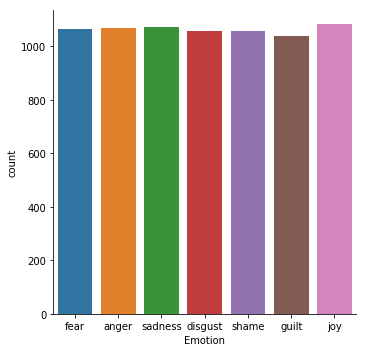

In [18]:
sns.catplot(kind='count', x='Emotion', data = datas)
plt.show()

In [19]:
datas.isna().sum()

Emotion     0
Sentence    0
dtype: int64

In [20]:
datas.tail()

,Emotion,Sentence
7441,sadness,When I was ill and had to stay at the hospital...
7442,disgust,A few days back I was waiting for the bus at t...
7443,shame,A few days back I had a tutorial class and the...
7444,guilt,Once I quarrelled with my sister and after thi...
7445,joy,On days when I feel close to my partner and ot...


In [21]:
y = datas['Emotion']

In [22]:
y.head()

0       fear
1      anger
2    sadness
3    disgust
4      shame
Name: Emotion, dtype: object

In [23]:
X = datas['Sentence']

In [24]:
X.head()

0    Every time I imagine that someone I love or I ...
1    When I had been obviously unjustly treated and...
2    When I think about the short time that we live...
3    At a gathering I found myself involuntarily si...
4    When I realized that I was directing the feeli...
Name: Sentence, dtype: object

Converting all text to lovercase

In [25]:
Counter(y)

Counter({'fear': 1063,
         'anger': 1069,
         'sadness': 1074,
         'disgust': 1059,
         'shame': 1059,
         'guilt': 1040,
         'joy': 1082})

In [26]:
tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize, stop_words='english', min_df=3, ngram_range=(1, 2), lowercase=True)

In [27]:
tfidf.fit(X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=3, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function word_tokenize at 0x000001A305FFA488>,
                use_idf=True, vocabulary=None)

In [28]:
with open('tfidt_feature_vector.pkl', 'wb') as fp:
    pickle.dump(tfidf, fp)

In [29]:
X = tfidf.transform(X)

In [30]:
tfidf.vocabulary_

{'time': 5841,
 'imagine': 3367,
 'love': 3812,
 'contact': 1798,
 'illness': 3363,
 ',': 102,
 'death': 1970,
 '.': 407,
 'illness ,': 3364,
 'death .': 1972,
 'obviously': 4274,
 'unjustly': 6078,
 'treated': 5946,
 'possibility': 4614,
 'think': 5805,
 'short': 5289,
 'live': 3745,
 'life': 3701,
 'did': 2044,
 'use': 6101,
 'short time': 5291,
 'think did': 5808,
 'time .': 5846,
 'gathering': 2898,
 'sitting': 5346,
 'people': 4473,
 'expressed': 2456,
 'opinions': 4335,
 'considered': 1793,
 'low': 3828,
 'realized': 4834,
 'feelings': 2585,
 'discontent': 2131,
 'partner': 4425,
 'way': 6227,
 'trying': 5990,
 'blame': 1260,
 'instead': 3419,
 'feel': 2562,
 'guilty': 3102,
 'realize': 4833,
 'consider': 1790,
 'material': 3908,
 'things': 5798,
 'important': 3376,
 'relatives': 4924,
 'feel guilty': 2572,
 'relatives .': 4925,
 '. feel': 507,
 'girlfriend': 2945,
 'taken': 5685,
 'exam': 2395,
 'went': 6260,
 'parent': 4398,
 "'s": 20,
 'place': 4559,
 'taken exam': 5689,
 "par

Making Models

In [31]:
bayes_classification = MultinomialNB()
dtree_classification = DecisionTreeClassifier()
Knn = KNeighborsClassifier()

In [32]:
def calculate_performance(test, pred, algorithm):
    print(f'####For {algorithm}')
    print(f'{classification_report(test, pred)}')

In [33]:
def train(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    bayes_classification.fit(X_train, y_train)
    bayes_pred = bayes_classification.predict(X_test)
    calculate_performance(y_test, bayes_pred, 'Naive Bayes')
    pickle.dump(bayes_classification, open("Naive_bayes_model.pkl", 'wb'))
    
    dtree_classification.fit(X_train, y_train)
    dtree_pred = dtree_classification.predict(X_test)
    calculate_performance(y_test, dtree_pred, 'Decision Tree')
    
    Knn.fit(X_train, y_train)
    knn_pred = Knn.predict(X_test)
    print(knn_pred)
    calculate_performance(y_test, dtree_pred, 'KNN')

In [34]:
train(X, y)

####For Naive Bayes
              precision    recall  f1-score   support

       anger       0.46      0.43      0.45       265
     disgust       0.59      0.60      0.59       264
        fear       0.62      0.66      0.64       260
       guilt       0.51      0.48      0.50       262
         joy       0.66      0.74      0.70       278
     sadness       0.56      0.58      0.57       271
       shame       0.53      0.47      0.49       262

    accuracy                           0.57      1862
   macro avg       0.56      0.57      0.56      1862
weighted avg       0.56      0.57      0.56      1862

####For Decision Tree
              precision    recall  f1-score   support

       anger       0.36      0.33      0.34       265
     disgust       0.41      0.47      0.44       264
        fear       0.56      0.56      0.56       260
       guilt       0.39      0.36      0.37       262
         joy       0.54      0.57      0.56       278
     sadness       0.54      0.46   